In [1]:
import pandas as pd
df=pd.read_csv("../input/vehicle-dataset-from-cardekho/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
df.shape

(301, 9)

In [3]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [4]:
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Fuel_Type.unique())
print(df.Owner.unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


<AxesSubplot:>

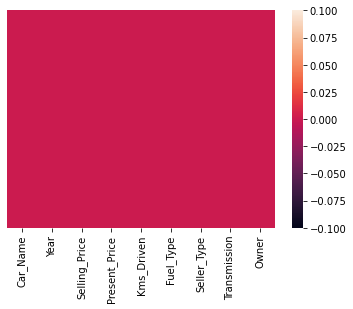

In [5]:
#CHECKING NULL VALUES
print(df.isnull().sum())
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


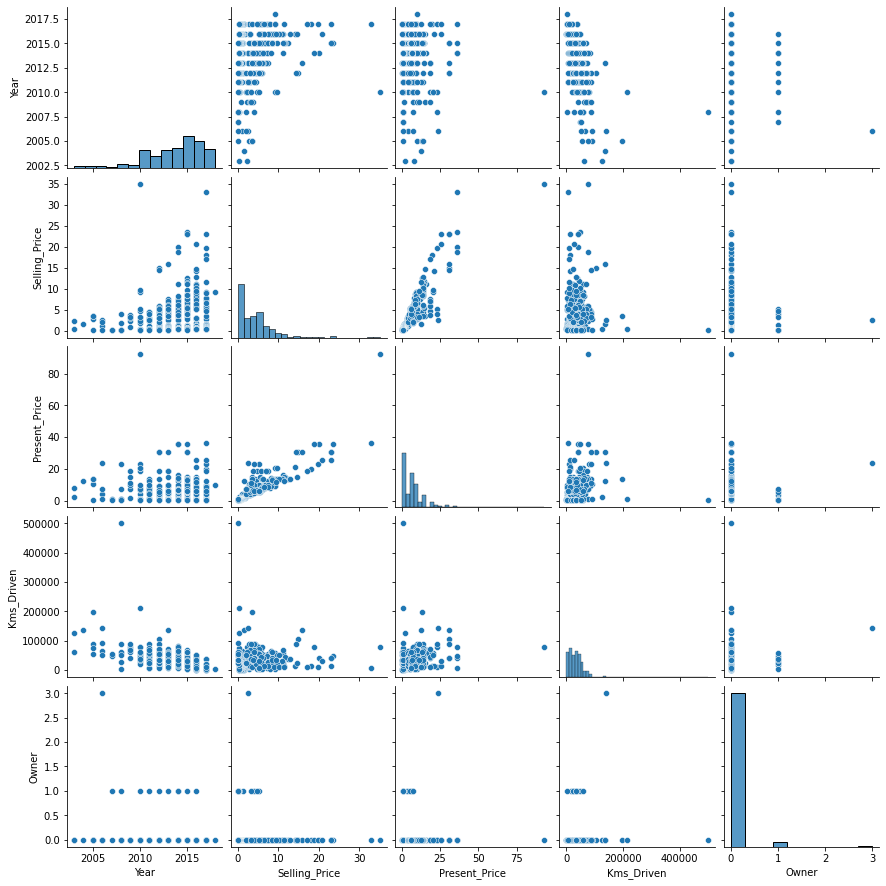

In [6]:
print(df.columns)
sns.pairplot(df)

In [7]:
corrmat=df.corr()
print(corrmat)

                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000


<AxesSubplot:>

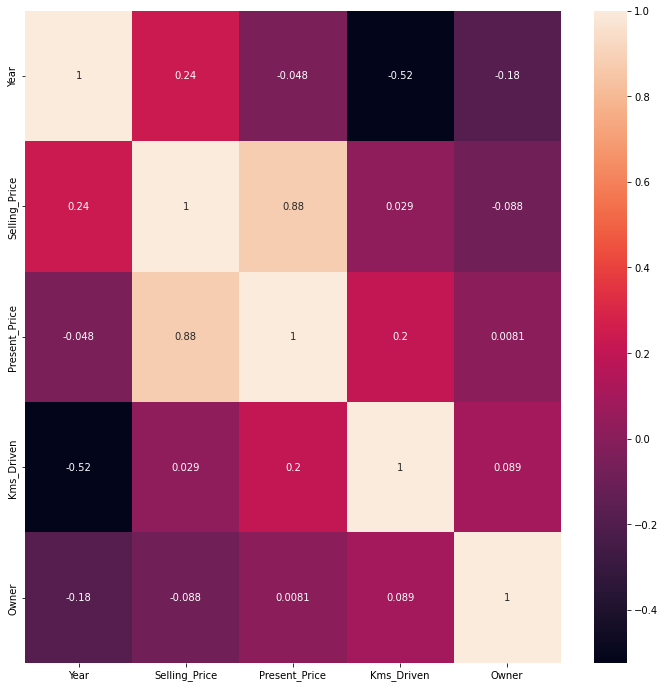

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,12))
sns.heatmap(corrmat,annot=True)

In [9]:
#Select attributes and set target
X=df.drop(['Car_Name','Selling_Price'],axis=1)
X.head()
y=df.Selling_Price
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [10]:
#Feauture Engineering
X['No._of_years']=2022-X.Year

In [11]:
X.drop(['Year'],axis=1,inplace=True)
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No._of_years
0,5.59,27000,Petrol,Dealer,Manual,0,8
1,9.54,43000,Diesel,Dealer,Manual,0,9
2,9.85,6900,Petrol,Dealer,Manual,0,5
3,4.15,5200,Petrol,Dealer,Manual,0,11
4,6.87,42450,Diesel,Dealer,Manual,0,8


In [12]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)
#convert categorical features using one-hot encoding
X_train=pd.get_dummies(X_train,drop_first=True)
X_valid=pd.get_dummies(X_valid,drop_first=True)
X_train,X_valid=X_train.align(X_valid,join='left',axis=1)

print(X_train.columns)
X_valid.columns
print(X_valid.isnull().sum())
X_valid.fillna(1,inplace=True)
print(X_valid.isnull().sum())

Index(['Present_Price', 'Kms_Driven', 'Owner', 'No._of_years',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')
Present_Price              0
Kms_Driven                 0
Owner                      0
No._of_years               0
Fuel_Type_Diesel          61
Fuel_Type_Petrol           0
Seller_Type_Individual     0
Transmission_Manual        0
dtype: int64
Present_Price             0
Kms_Driven                0
Owner                     0
No._of_years              0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64


<AxesSubplot:>

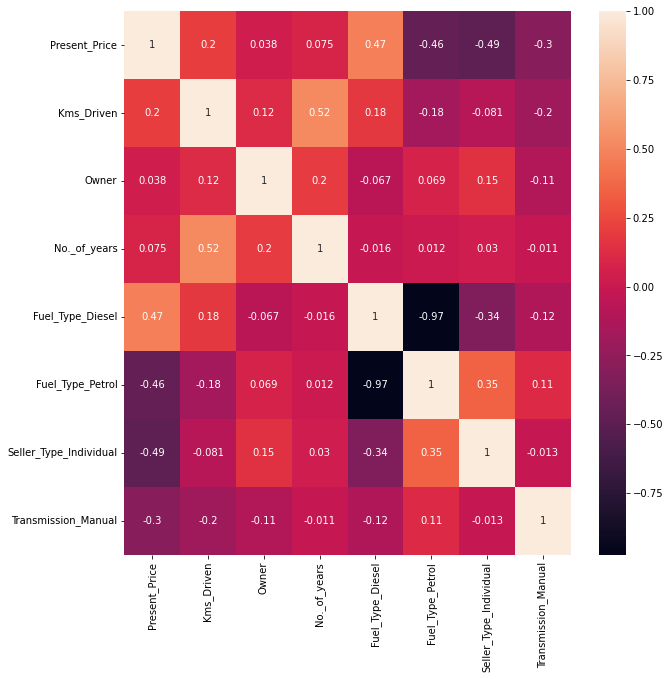

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(),annot=True)

In [14]:
#feauture importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [15]:
print(model.feature_importances_)

[3.99630947e-01 4.14616264e-02 1.27955843e-04 7.44319928e-02
 2.19591994e-01 1.74856148e-02 1.15137180e-01 1.32132689e-01]


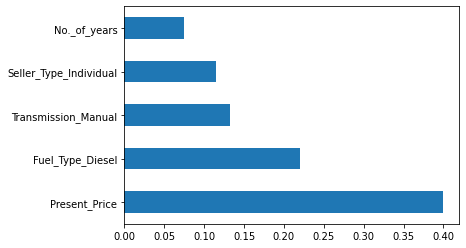

In [16]:
feat_importance=pd.Series(model.feature_importances_,index=X_train.columns)
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor
mymodel=RandomForestRegressor()

In [18]:
#Hyperparameters
import numpy as np

#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#maximum number of leaves in trees
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]
#minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [19]:
from sklearn.model_selection import RandomizedSearchCV

#create the random grid
random_grid={'n_estimators': n_estimators,
             'max_depth':max_depth,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [20]:
#Use the random grid to search for best hyperparameters
random_rf= RandomizedSearchCV(estimator=mymodel,param_distributions=random_grid,scoring='neg\
_mean_squared_error',cv=5,verbose=2,random_state=10)

In [21]:
random_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.6s
[CV] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.6s
[CV] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.7s
[CV] END max_depth=25, min_samples_leaf=10, min_samples_split=2, n_estimators=1000; total time=   1.8s
[CV] END max_dept

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=2)

In [22]:
predictions=random_rf.predict(X_valid)
predictions

array([ 6.91644593,  0.48374783,  4.76137195,  8.96858302, 14.6044745 ,
        5.32595501,  3.25111984,  0.4402103 ,  3.92707016,  4.98003499,
        2.86227631,  0.73968451,  4.83392592,  7.32455481,  7.80192712,
       14.75214484,  6.8328346 ,  4.06412704,  0.4485235 ,  1.58477976,
        3.36625143,  5.00931679,  5.32643502, 10.49453953,  0.19645821,
        0.75304968,  0.31940206,  0.71851833,  0.48636102,  4.6728675 ,
        2.62178969,  5.94025226,  0.49361685,  7.35034788,  3.5520679 ,
        1.16270978,  5.76429931,  5.37803883,  0.24491964,  8.03875224,
        8.06839961, 22.62564419,  4.9431281 ,  4.56087762,  5.7467629 ,
       11.09024639,  0.24090547,  0.80337383,  5.52518967,  6.64541071,
        6.7310052 ,  3.06422847,  5.38273729, 23.51791887,  1.16492988,
        1.14797738,  0.476745  ,  2.59744047,  3.59487632,  2.57949782,
        4.27772077])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

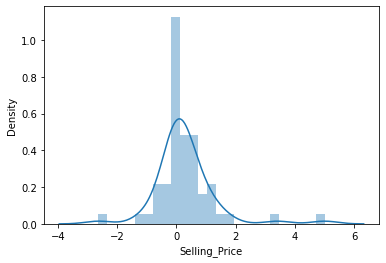

In [23]:
sns.distplot(y_valid-predictions)

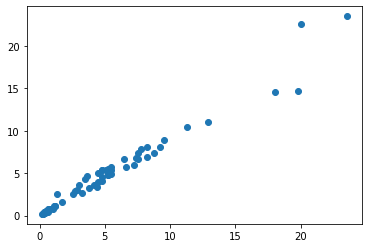

In [24]:
plt.scatter(y_valid,predictions)


In [25]:
from sklearn.metrics import mean_absolute_error
np.sqrt(mean_absolute_error(y_valid,predictions))

0.7645680533796017